# Project Name --- Real Estate Investment Advisor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             mean_squared_error, mean_absolute_error, r2_score)
from xgboost import XGBClassifier, XGBRegressor
import mlflow
import mlflow.sklearn
import warnings
import os
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline


# Load the dataset

In [2]:
df = pd.read_csv('D:/Real Estate Investment Advisor/data/india_housing_prices.csv')

In [3]:
print("Dataset info")
df.info()

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Tot

In [4]:
print("First 5  rows")
df.head()

First 5  rows


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [5]:
print("Missing Values")
df.isnull().sum()

Missing Values


ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [6]:
print("Basic Statistics")
df.describe()

Basic Statistics


,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


# Data cleaning 

In [7]:
def clean_data(df):
    """Handle missing values and duplicates"""
    df = df.copy()
    
    # Remove duplicates
    df = df.drop_duplicates()

    # Fill numeric columns with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    # Fill categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

df_cleaned = clean_data(df)
print("Data cleaned successfully!")
print(f"Shape after cleaning: {df_cleaned.shape}")


Data cleaned successfully!
Shape after cleaning: (250000, 23)


# Feature Engineering

In [8]:
def engineer_features(df):
    """Create derived features and target variables"""
    df = df.copy()
    
    # 1. Price per SqFt (correct calculation)
    df['Price_per_SqFt'] = (df['Price_in_Lakhs'] * 100000) / df['Size_in_SqFt']
    
    # 2. Age of Property
    current_year = 2024
    df['Age_of_Property'] = current_year - df['Year_Built']
    
    # 3. Floor Ratio
    df['Floor_Ratio'] = df['Floor_No'] / (df['Total_Floors'] + 1)
    
    # 4. School Density Score
    df['School_Density_Score'] = df['Nearby_Schools'] / (df['Size_in_SqFt'] / 1000)
    
    # 5. Hospital Density Score
    df['Hospital_Density_Score'] = df['Nearby_Hospitals'] / (df['Size_in_SqFt'] / 1000)
    
    # 6. Amenities Score (count amenities)
    df['Amenities_Score'] = df['Amenities'].str.count(',') + 1
    df['Amenities_Score'] = df['Amenities_Score'].fillna(0)
    
    # 7. Good Investment Classification (Multi-factor Score)
    # Calculate median price per sqft for each city
    city_median_price = df.groupby('City')['Price_per_SqFt'].median()
    df['City_Median_Price'] = df['City'].map(city_median_price)
    df['Price_vs_Median'] = df['Price_per_SqFt'] <= df['City_Median_Price']
    
    # Multi-factor scoring system
    score = 0
    score += (df['BHK'] >= 3).astype(int) * 2
    score += (df['Price_vs_Median']).astype(int) * 3
    score += (df['Public_Transport_Accessibility'].isin(['High', 'Medium'])).astype(int) * 2
    score += (df['Nearby_Schools'] >= 3).astype(int) * 1
    score += (df['Age_of_Property'] <= 10).astype(int) * 1
    score += (df['Security'] != 'No').astype(int) * 1
    score += (df['Amenities_Score'] >= 3).astype(int) * 1
    
    df['Investment_Score'] = score
    df['Good_Investment'] = (score >= 8).astype(int)
    
    # 8. Future Price Prediction Target (5 years)
    # Base appreciation rate varies by city and property type
    appreciation_rates = {
        'Mumbai': 0.10, 'Delhi': 0.09, 'Bangalore': 0.08, 'Pune': 0.07,
        'Chennai': 0.07, 'Hyderabad': 0.08, 'Kolkata': 0.06, 'Ahmedabad': 0.06,
        'Other': 0.05
    }
    
    # Map cities to rates (default to 'Other' if not found)
    df['Appreciation_Rate'] = df['City'].map(appreciation_rates).fillna(appreciation_rates['Other'])
    
    # Adjust rate based on property features
    df['Appreciation_Rate'] += (df['BHK'] >= 3).astype(int) * 0.01
    df['Appreciation_Rate'] += (df['Public_Transport_Accessibility'] == 'High').astype(int) * 0.02
    df['Appreciation_Rate'] += (df['Age_of_Property'] <= 5).astype(int) * 0.01
    
    df['Future_Price_5Y'] = df['Price_in_Lakhs'] * (1 + df['Appreciation_Rate']) ** 5
    
    return df

df_engineered = engineer_features(df_cleaned)
print("Feature Engineering Complete")
print("\nNew Features Added:")
print(df_engineered[['Price_per_SqFt', 'Age_of_Property', 'Investment_Score', 'Good_Investment', 'Future_Price_5Y', 'Appreciation_Rate']].head())

Feature Engineering Complete

New Features Added:
   Price_per_SqFt  Age_of_Property  Investment_Score  Good_Investment  \
0    10332.489451               34                 4                0   
1     8270.727580               16                 8                1   
2     5046.403075               27                 5                0   
3    10955.490697               33                 5                0   
4     3792.245490               22                 8                1   

   Future_Price_5Y  Appreciation_Rate  
0       753.556468               0.09  
1       287.283026               0.08  
2       234.567788               0.05  
3       421.172259               0.07  
4       244.761458               0.06  


# Exploratory Data Analysis

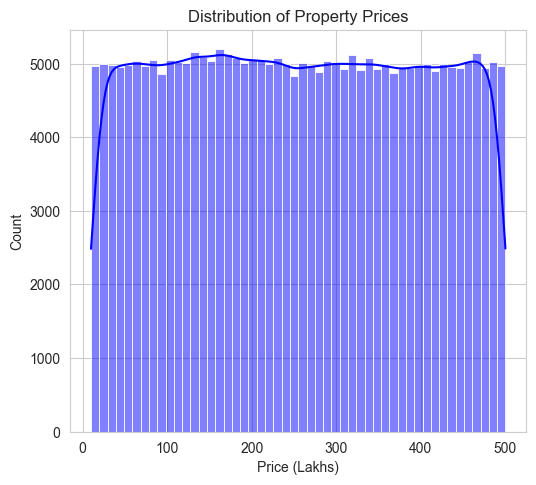

In [9]:
plt.figure(figsize=(20, 24))

# 1. Price Distribution
plt.subplot(4, 3, 1)
sns.histplot(df_engineered['Price_in_Lakhs'], bins=50, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (Lakhs)')
plt.show()

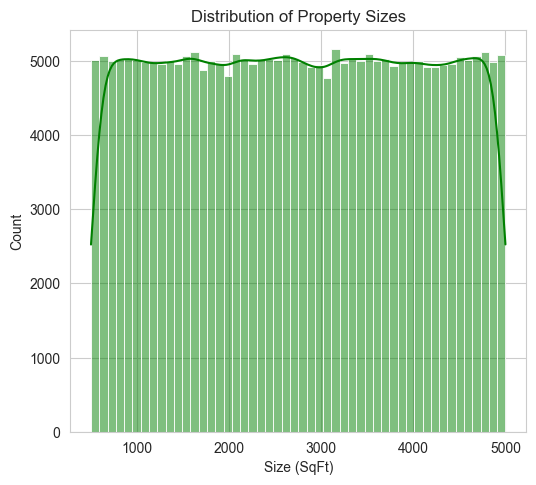

In [10]:
plt.figure(figsize=(20, 24))

# 2. Size Distribution
plt.subplot(4, 3, 2)
sns.histplot(df_engineered['Size_in_SqFt'], bins=50, kde=True, color='green')
plt.title('Distribution of Property Sizes')
plt.xlabel('Size (SqFt)')
plt.show()

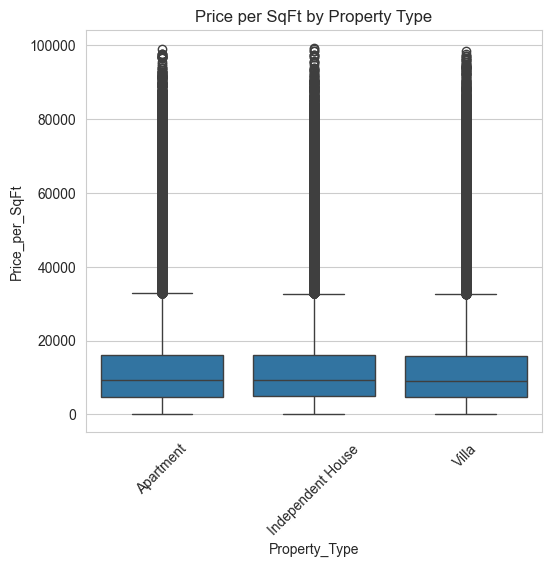

In [11]:
plt.figure(figsize=(20, 24))

# 3. Price per SqFt by Property Type
plt.subplot(4, 3, 3)
sns.boxplot(data=df_engineered, x='Property_Type', y='Price_per_SqFt')
plt.title('Price per SqFt by Property Type')
plt.xticks(rotation=45)
plt.show()

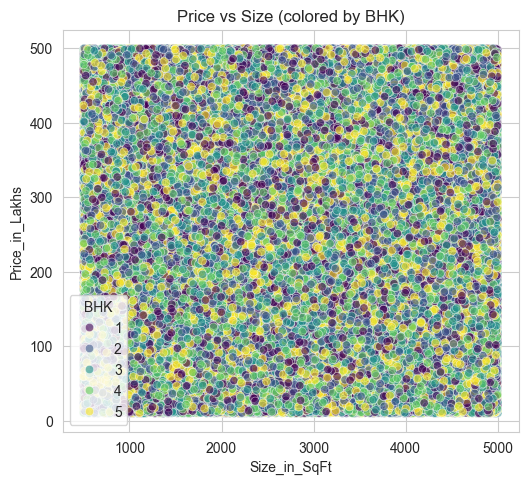

In [12]:
plt.figure(figsize=(20, 24))

# 4. Price vs Size
plt.subplot(4, 3, 4)
sns.scatterplot(data=df_engineered, x='Size_in_SqFt', y='Price_in_Lakhs', 
                hue='BHK', alpha=0.6, palette='viridis')
plt.title('Price vs Size (colored by BHK)')
plt.show()

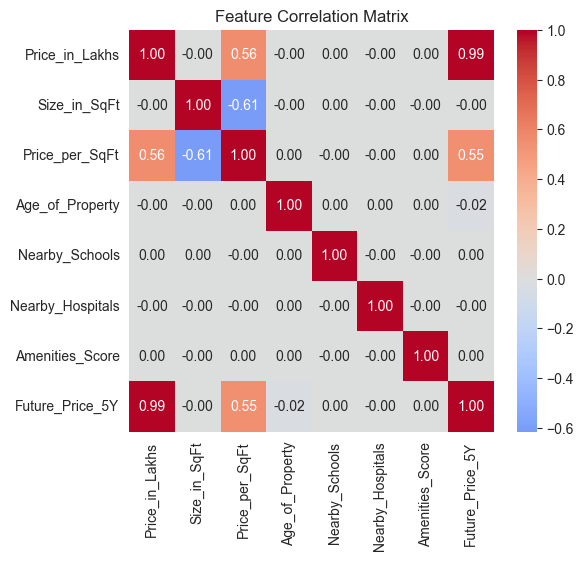

In [13]:
plt.figure(figsize=(20, 24))

# 5. Correlation Heatmap
plt.subplot(4, 3, 5)
numeric_cols = ['Price_in_Lakhs', 'Size_in_SqFt', 'Price_per_SqFt', 'Age_of_Property', 
                'Nearby_Schools', 'Nearby_Hospitals', 'Amenities_Score', 'Future_Price_5Y']
corr_matrix = df_engineered[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

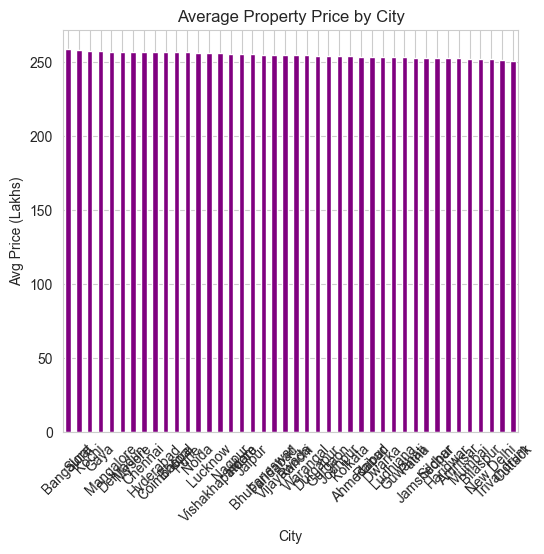

In [14]:
plt.figure(figsize=(20, 24))

# 6. Average Price by City
plt.subplot(4, 3, 6)
city_price = df_engineered.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False)
city_price.plot(kind='bar', color='purple')
plt.title('Average Property Price by City')
plt.xticks(rotation=45)
plt.ylabel('Avg Price (Lakhs)')
plt.show()

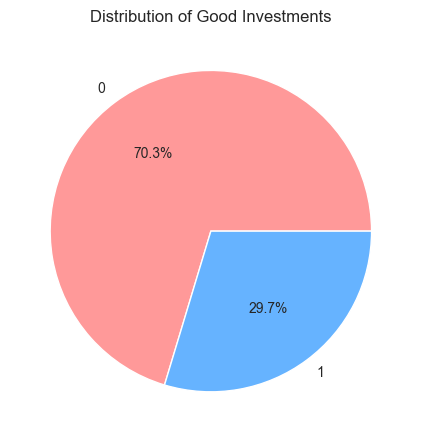

In [15]:
plt.figure(figsize=(20, 24))

# 7. Good Investment Distribution
plt.subplot(4, 3, 7)
df_engineered['Good_Investment'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                      colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Good Investments')
plt.ylabel('')
plt.show()

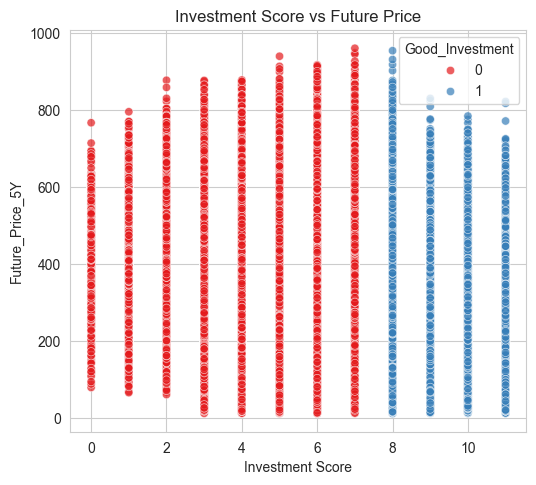

In [16]:
plt.figure(figsize=(20, 24))

# 8. Investment Score vs Future Price
plt.subplot(4, 3, 8)
sns.scatterplot(data=df_engineered, x='Investment_Score', y='Future_Price_5Y', 
                hue='Good_Investment', palette='Set1', alpha=0.7)
plt.title('Investment Score vs Future Price')
plt.xlabel('Investment Score')
plt.show()

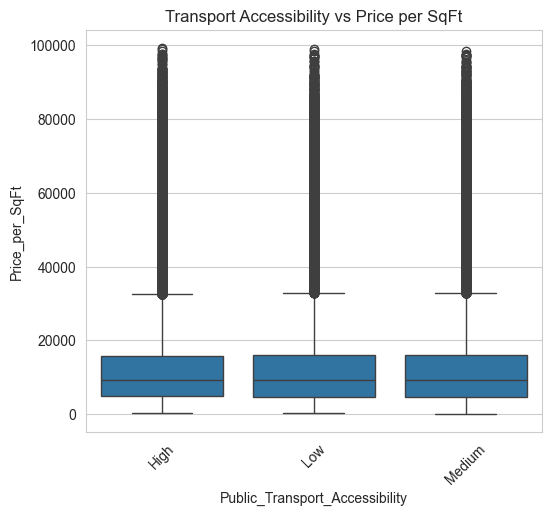

In [17]:
plt.figure(figsize=(20, 24))

# 9. Transport Accessibility vs Price
plt.subplot(4, 3, 9)
sns.boxplot(data=df_engineered, x='Public_Transport_Accessibility', y='Price_per_SqFt')
plt.title('Transport Accessibility vs Price per SqFt')
plt.xticks(rotation=45)
plt.show()

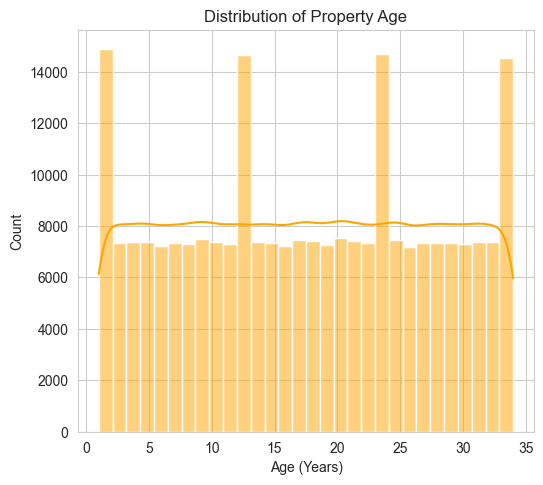

In [18]:
plt.figure(figsize=(20, 24))

# 10. Property Age Distribution
plt.subplot(4, 3, 10)
sns.histplot(df_engineered['Age_of_Property'], bins=30, kde=True, color='orange')
plt.title('Distribution of Property Age')
plt.xlabel('Age (Years)')
plt.show()

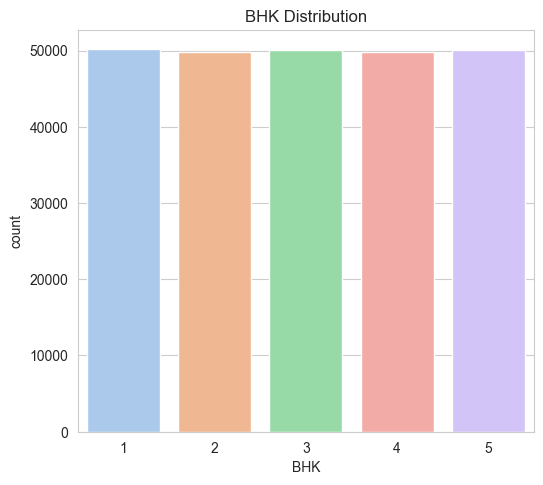

In [19]:
plt.figure(figsize=(20, 24))

# 11. BHK Distribution
plt.subplot(4, 3, 11)
sns.countplot(data=df_engineered, x='BHK', palette='pastel')
plt.title('BHK Distribution')
plt.show()

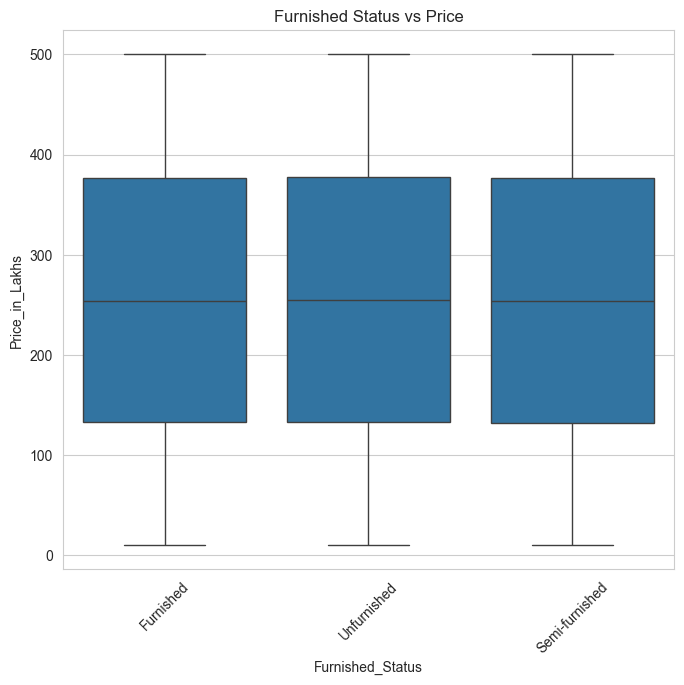

In [20]:
plt.figure(figsize=(20, 24))

# 12. Furnished Status vs Price
plt.subplot(4, 3, 12)
sns.boxplot(data=df_engineered, x='Furnished_Status', y='Price_in_Lakhs')
plt.title('Furnished Status vs Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Top expensive localities

df_engineered['Locality_Clean'] = df_engineered['Locality'].str.extract(r'Locality_(\d+)').astype(int)
top_localities = df_engineered.groupby('Locality')['Price_per_SqFt'].mean().nlargest(5).index
locality_trends = df_engineered[df_engineered['Locality'].isin(top_localities)]
fig = px.box(locality_trends, x='Locality', y='Price_per_SqFt', 
             title='Price per SqFt in Top 5 Expensive Localities')
fig.show()

# Data Preprocessing for Modeling

In [22]:
def preprocess_data(df):
    """Prepare data for machine learning models"""
    df = df.copy()
    
    # Select features for modeling
    feature_columns = [
        'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
        'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors',
        'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
        'Parking_Space', 'Security', 'Amenities_Score', 'Facing', 'Owner_Type',
        'Availability_Status', 'Age_of_Property', 'Price_per_SqFt',
        'Floor_Ratio', 'School_Density_Score', 'Hospital_Density_Score'
    ]
    
    X = df[feature_columns]
    y_class = df['Good_Investment']
    y_reg = df['Future_Price_5Y']
    
    # Separate categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(exclude=['object']).columns
    
    print(f"Categorical columns: {len(categorical_cols)}")
    print(f"Numerical columns: {len(numerical_cols)}")
    
    # Encode categorical variables
    le_dict = {}
    for col in categorical_cols:
        le = LabelEncoder()
        # Handle unknown values during prediction
        X[col] = X[col].astype(str)
        le.fit(X[col])
        X[col] = le.transform(X[col])
        le_dict[col] = le
    
    # Scale numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    return X, y_class, y_reg, le_dict, scaler, categorical_cols, numerical_cols

X, y_class, y_reg, le_dict, scaler, cat_cols, num_cols = preprocess_data(df_engineered)

# Split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("\nData Preprocessing Complete!")
print(f"Classification Train Shape: {X_train_class.shape}, Test Shape: {X_test_class.shape}")
print(f"Regression Train Shape: {X_train_reg.shape}, Test Shape: {X_test_reg.shape}")

Categorical columns: 11
Numerical columns: 13

Data Preprocessing Complete!
Classification Train Shape: (200000, 24), Test Shape: (50000, 24)
Regression Train Shape: (200000, 24), Test Shape: (50000, 24)


# MLflow Setup

In [23]:
# Set MLflow tracking URI
mlflow.set_tracking_uri("mlruns")
mlflow.set_experiment("Real_Estate_Investment_Advisor")

print("MLflow Experiment Setup Complete!")
print(f"Tracking URI: {mlflow.get_tracking_uri()}")

2025/12/04 21:14:48 INFO mlflow.tracking.fluent: Experiment with name 'Real_Estate_Investment_Advisor' does not exist. Creating a new experiment.


MLflow Experiment Setup Complete!
Tracking URI: mlruns


# Classification Model Training


Training Logistic Regression...


2025/12/04 21:14:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:15:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.8256
Precision: 0.7310
Recall: 0.6520
F1-Score: 0.6892
AUC-ROC: 0.8943

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     35171
           1       0.73      0.65      0.69     14829

    accuracy                           0.83     50000
   macro avg       0.80      0.78      0.78     50000
weighted avg       0.82      0.83      0.82     50000



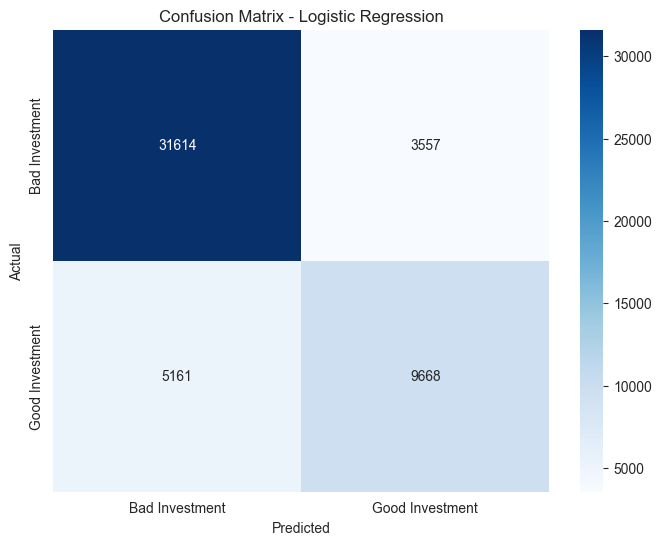


Training Random Forest Classifier...


2025/12/04 21:15:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:15:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9975
Precision: 0.9962
Recall: 0.9953
F1-Score: 0.9957
AUC-ROC: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35171
           1       1.00      1.00      1.00     14829

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



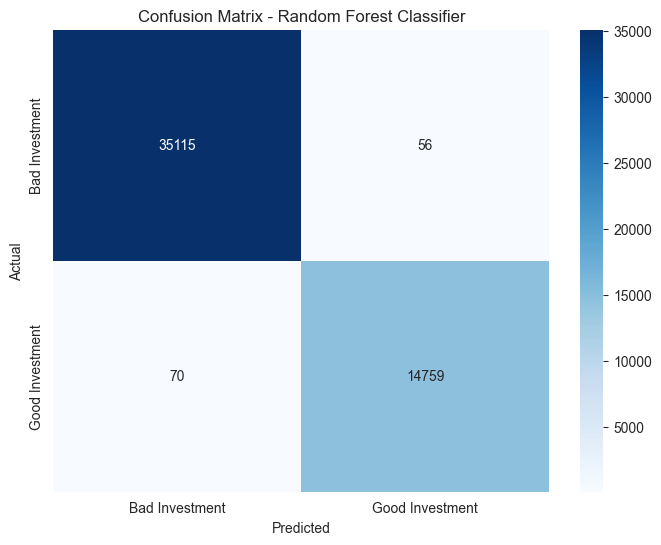


Training XGBoost Classifier...


2025/12/04 21:15:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:15:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9990
Precision: 0.9982
Recall: 0.9984
F1-Score: 0.9983
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35171
           1       1.00      1.00      1.00     14829

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



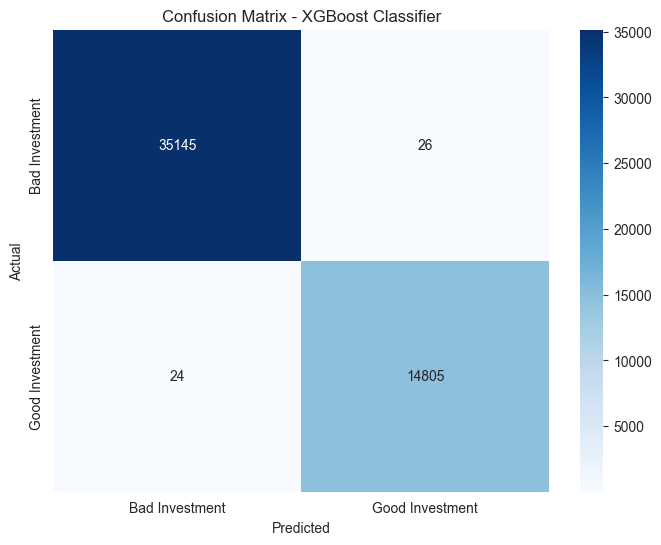


 Best Classification Model: XGBoost Classifier


In [24]:
def train_classification_models(X_train, X_test, y_train, y_test):
    """Train and evaluate multiple classification models"""
    
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
        'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        'XGBoost Classifier': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, eval_metric='logloss')
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name}...")
        print(f"{'='*50}")
        
        with mlflow.start_run(run_name=f"Classification_{name.replace(' ', '_')}"):
            # Train model
            model.fit(X_train, y_train)
            
            # Predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
            
            # Metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
            
            # Log metrics
            mlflow.log_params({"model": name, "n_estimators": 100 if "Forest" in name or "XGBoost" in name else "N/A"})
            mlflow.log_metrics({
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1_score": f1,
                "auc_roc": auc
            })
            
            # Log model
            mlflow.sklearn.log_model(model, f"classification_model_{name.replace(' ', '_')}")
            
            # Store results
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'auc_roc': auc
            }
            
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"AUC-ROC: {auc:.4f}")
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))
            
            # Confusion Matrix
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=['Bad Investment', 'Good Investment'],
                        yticklabels=['Bad Investment', 'Good Investment'])
            plt.title(f'Confusion Matrix - {name}')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()
    
    return results

classification_results = train_classification_models(
    X_train_class, X_test_class, y_train_class, y_test_class
)

# Get best classification model
best_class_model_name = max(classification_results.items(), key=lambda x: x[1]['accuracy'])[0]
best_class_model = classification_results[best_class_model_name]['model']
print(f"\n Best Classification Model: {best_class_model_name}")


# Regression Model Training


Training Linear Regression...


2025/12/04 21:15:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:15:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RMSE: 127.6472
MAE: 100.7624
R² Score: 0.5853


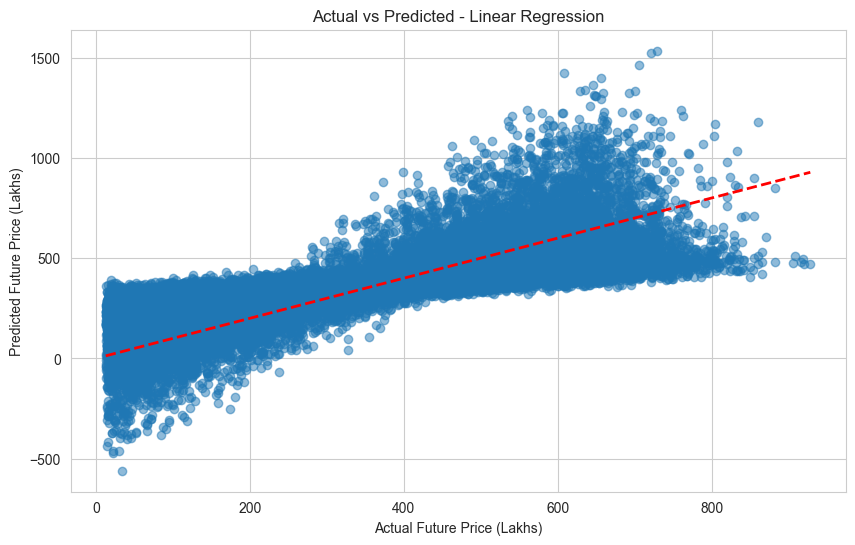

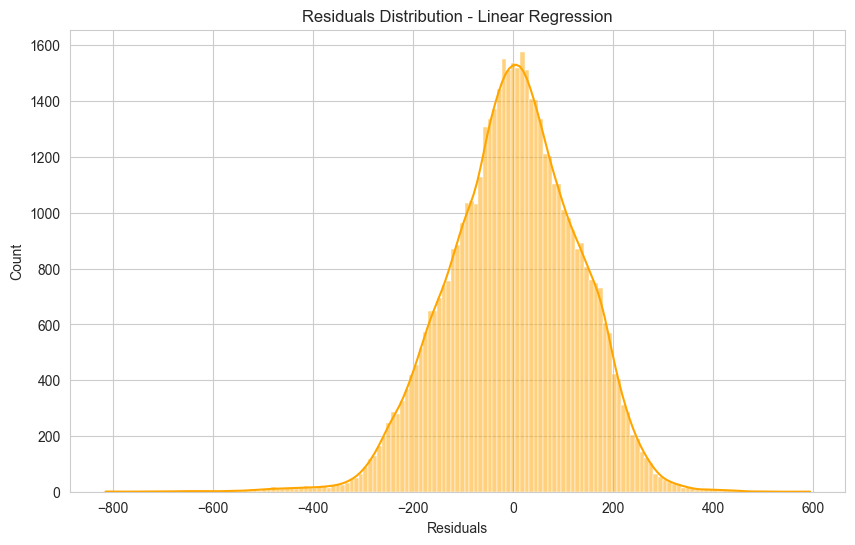


Training Random Forest Regressor...


2025/12/04 21:16:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:16:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RMSE: 19.3058
MAE: 10.8882
R² Score: 0.9905


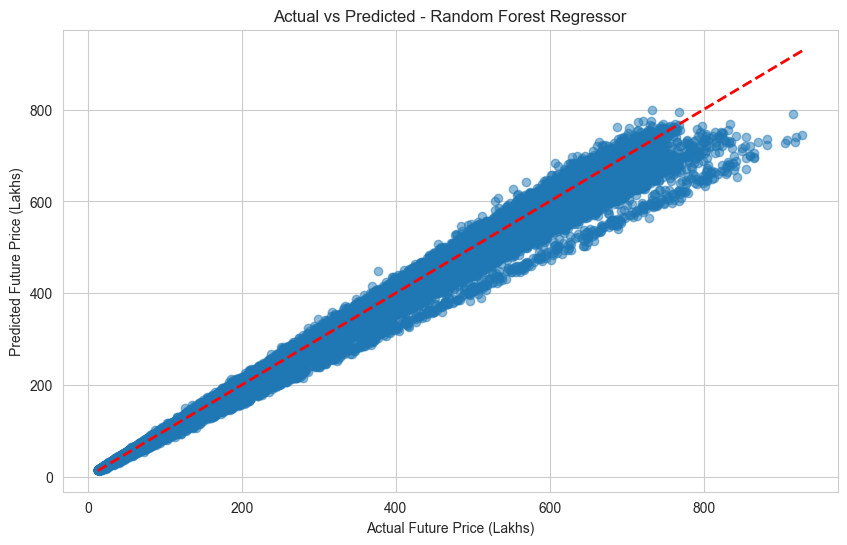

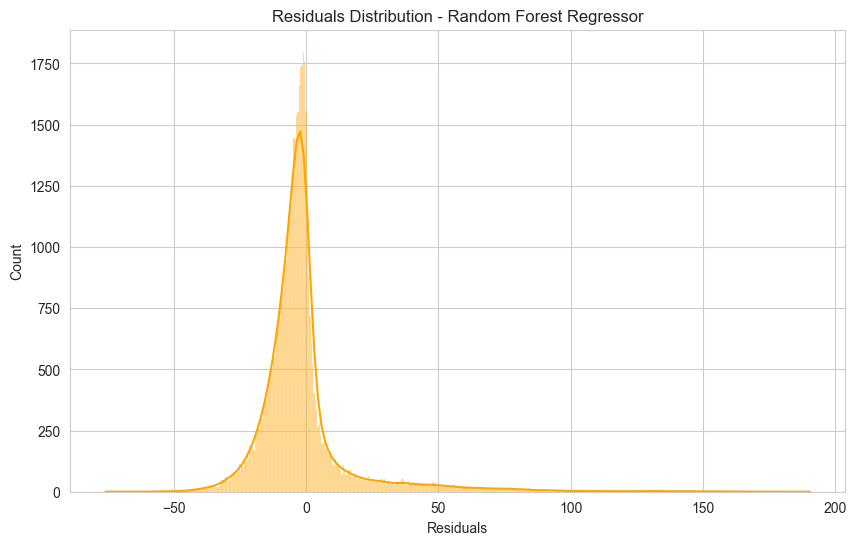


Training XGBoost Regressor...


2025/12/04 21:16:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/04 21:16:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RMSE: 8.0098
MAE: 5.7666
R² Score: 0.9984


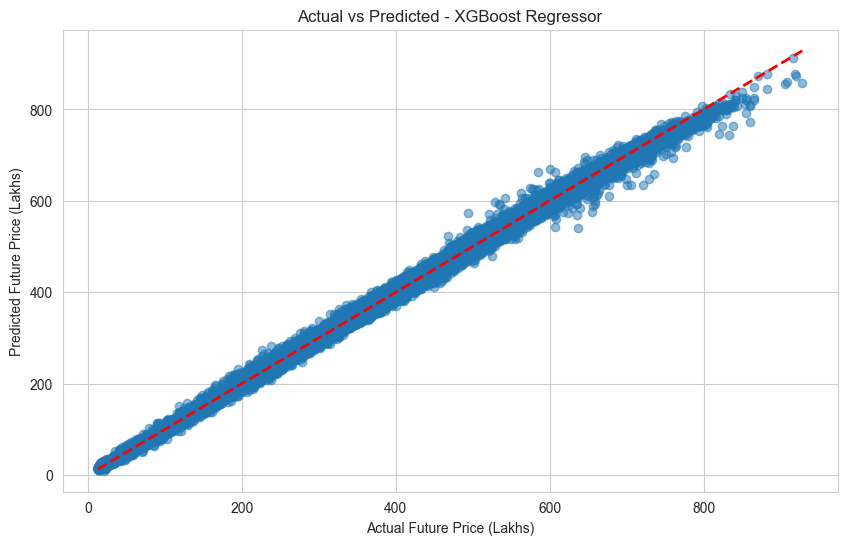

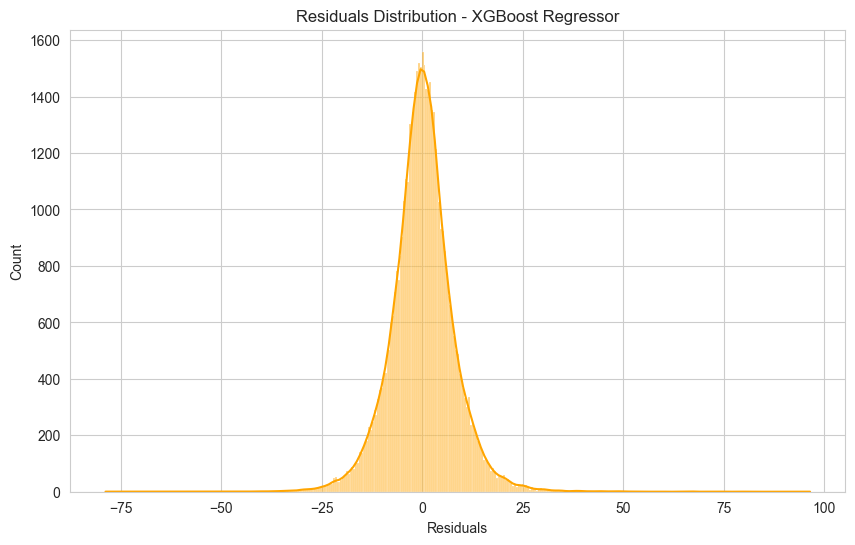


 Best Regression Model: XGBoost Regressor


In [25]:
def train_regression_models(X_train, X_test, y_train, y_test):
    """Train and evaluate multiple regression models"""
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name}...")
        print(f"{'='*50}")
        
        with mlflow.start_run(run_name=f"Regression_{name.replace(' ', '_')}"):
            # Train model
            model.fit(X_train, y_train)
            
            # Predictions
            y_pred = model.predict(X_test)
            
            # Metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Log metrics
            mlflow.log_params({"model": name, "n_estimators": 100 if "Forest" in name or "XGBoost" in name else "N/A"})
            mlflow.log_metrics({
                "rmse": rmse,
                "mae": mae,
                "r2_score": r2
            })
            
            # Log model
            mlflow.sklearn.log_model(model, f"regression_model_{name.replace(' ', '_')}")
            
            # Store results
            results[name] = {
                'model': model,
                'rmse': rmse,
                'mae': mae,
                'r2_score': r2,
                'predictions': y_pred
            }
            
            print(f"RMSE: {rmse:.4f}")
            print(f"MAE: {mae:.4f}")
            print(f"R² Score: {r2:.4f}")
            
            # Prediction vs Actual Plot
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            plt.xlabel('Actual Future Price (Lakhs)')
            plt.ylabel('Predicted Future Price (Lakhs)')
            plt.title(f'Actual vs Predicted - {name}')
            plt.show()
            
            # Residuals Plot
            residuals = y_test - y_pred
            plt.figure(figsize=(10, 6))
            sns.histplot(residuals, kde=True, color='orange')
            plt.title(f'Residuals Distribution - {name}')
            plt.xlabel('Residuals')
            plt.show()
    
    return results

regression_results = train_regression_models(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg
)

# Get best regression model
best_reg_model_name = max(regression_results.items(), key=lambda x: x[1]['r2_score'])[0]
best_reg_model = regression_results[best_reg_model_name]['model']
print(f"\n Best Regression Model: {best_reg_model_name}")

# Feature Importance Analysis

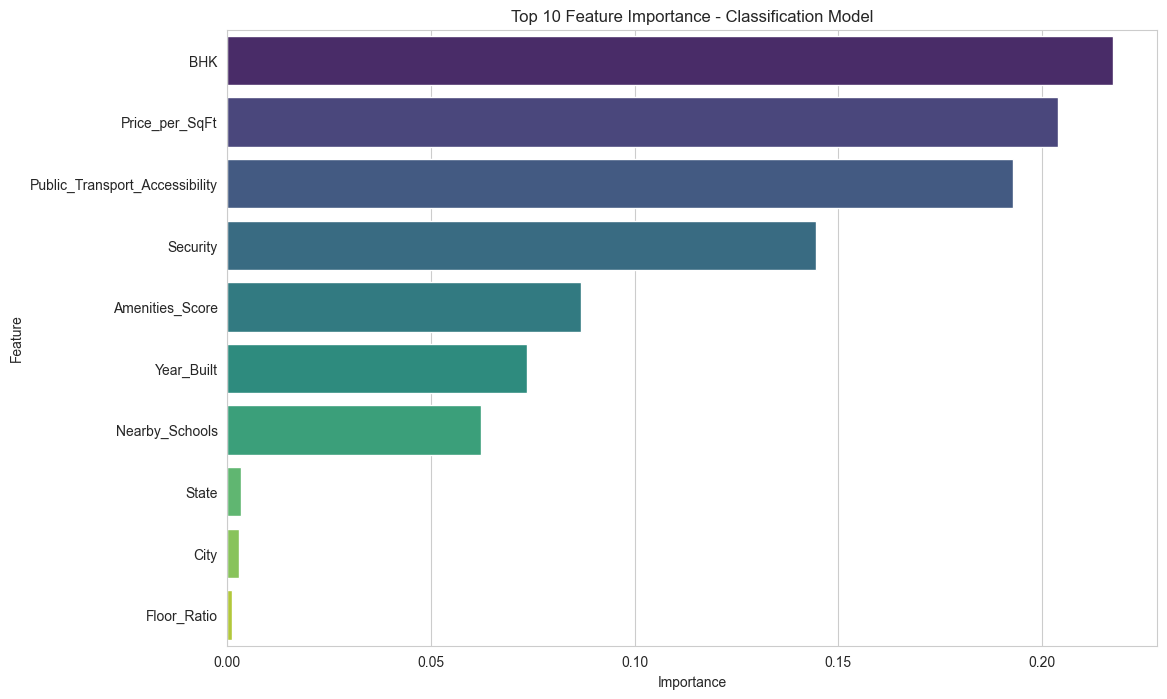

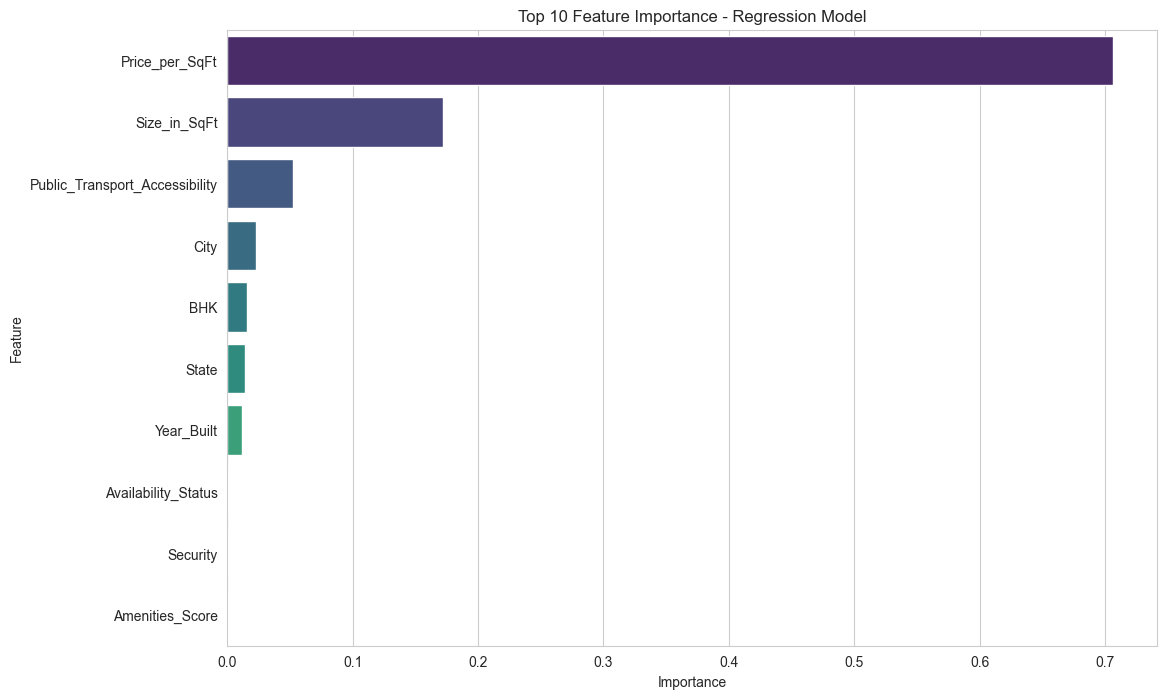

In [26]:
def plot_feature_importance(model, X_columns, title):
    """Plot feature importance"""
    if hasattr(model, 'feature_importances_'):
        importance = pd.DataFrame({
            'feature': X_columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importance, x='importance', y='feature', palette='viridis')
        plt.title(f'Top 10 Feature Importance - {title}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    elif hasattr(model, 'coef_'):
        importance = pd.DataFrame({
            'feature': X_columns,
            'importance': abs(model.coef_[0])
        }).sort_values('importance', ascending=False).head(10)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importance, x='importance', y='feature', palette='magma')
        plt.title(f'Top 10 Feature Coefficients - {title}')
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Feature')
        plt.show()

# Feature importance for best models
plot_feature_importance(best_class_model, X.columns, "Classification Model")
plot_feature_importance(best_reg_model, X.columns, "Regression Model")

# Save Models and Artifacts

In [27]:
import pickle
import joblib
import os

# Create directories
os.makedirs('models', exist_ok=True)
os.makedirs('artifacts', exist_ok=True)

# Save best models
joblib.dump(best_class_model, 'models/best_classification_model.pkl')
joblib.dump(best_reg_model, 'models/best_regression_model.pkl')

# Save encoders and scaler
with open('artifacts/label_encoders.pkl', 'wb') as f:
    pickle.dump(le_dict, f)

with open('artifacts/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature columns
with open('artifacts/feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

# Save numerical columns (FIXES THE ERROR)
# Define these as the numerical columns BEFORE engineering
numerical_columns = [
    'BHK', 'Size_in_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors',
    'Nearby_Schools', 'Nearby_Hospitals', 'Parking_Space', 'Amenities_Score',
    # Add any other original numerical features
]

with open('artifacts/numerical_columns.pkl', 'wb') as f:
    pickle.dump(numerical_columns, f)

# Save processed dataset
df_engineered.to_csv('artifacts/real_estate_processed.csv', index=False)

# Save unique values for Streamlit dropdowns
unique_values = {
    'State': df['State'].unique().tolist(),
    'City': df['City'].unique().tolist(),
    'Locality': df['Locality'].unique().tolist(),
    'Property_Type': df['Property_Type'].unique().tolist(),
    'Furnished_Status': df['Furnished_Status'].unique().tolist(),
    'Security': df['Security'].unique().tolist(),
    'Facing': df['Facing'].unique().tolist(),
    'Owner_Type': df['Owner_Type'].unique().tolist(),
    'Availability_Status': df['Availability_Status'].unique().tolist(),
    'Public_Transport_Accessibility': df['Public_Transport_Accessibility'].unique().tolist()
}

with open('artifacts/unique_values.pkl', 'wb') as f:
    pickle.dump(unique_values, f)

print("\n Models and artifacts saved successfully!")
print("\nSaved Files:")
print("- models/best_classification_model.pkl")
print("- models/best_regression_model.pkl")
print("- artifacts/label_encoders.pkl")
print("- artifacts/scaler.pkl")
print("- artifacts/feature_columns.pkl")
print("- artifacts/numerical_columns.pkl")  # New file
print("- artifacts/real_estate_processed.csv")
print("- artifacts/unique_values.pkl")


 Models and artifacts saved successfully!

Saved Files:
- models/best_classification_model.pkl
- models/best_regression_model.pkl
- artifacts/label_encoders.pkl
- artifacts/scaler.pkl
- artifacts/feature_columns.pkl
- artifacts/numerical_columns.pkl
- artifacts/real_estate_processed.csv
- artifacts/unique_values.pkl


# Project Summary

In [28]:
print("\n" + "="*60)
print(" PROJECT SUMMARY")
print("="*60)

print("\n Classification Models Performance:")
for name, metrics in classification_results.items():
    print(f"  {name}:")
    print(f"    Accuracy: {metrics['accuracy']:.4f} | F1-Score: {metrics['f1_score']:.4f} | AUC-ROC: {metrics['auc_roc']:.4f}")

print("\n Regression Models Performance:")
for name, metrics in regression_results.items():
    print(f"  {name}:")
    print(f"    RMSE: {metrics['rmse']:.4f} | MAE: {metrics['mae']:.4f} | R²: {metrics['r2_score']:.4f}")

print(f"\n Best Models:")
print(f"  Classification: {best_class_model_name} (Accuracy: {classification_results[best_class_model_name]['accuracy']:.4f})")
print(f"  Regression: {best_reg_model_name} (R²: {regression_results[best_reg_model_name]['r2_score']:.4f})")

print(f"\n Dataset Statistics:")
print(f"  Total Properties: {len(df_engineered)}")
print(f"  Good Investments: {df_engineered['Good_Investment'].sum()} ({df_engineered['Good_Investment'].mean()*100:.1f}%)")
print(f"  Average Price: ₹{df_engineered['Price_in_Lakhs'].mean():.2f} Lakhs")
print(f"  Average Future Price (5Y): ₹{df_engineered['Future_Price_5Y'].mean():.2f} Lakhs")


 PROJECT SUMMARY

 Classification Models Performance:
  Logistic Regression:
    Accuracy: 0.8256 | F1-Score: 0.6892 | AUC-ROC: 0.8943
  Random Forest Classifier:
    Accuracy: 0.9975 | F1-Score: 0.9957 | AUC-ROC: 0.9996
  XGBoost Classifier:
    Accuracy: 0.9990 | F1-Score: 0.9983 | AUC-ROC: 1.0000

 Regression Models Performance:
  Linear Regression:
    RMSE: 127.6472 | MAE: 100.7624 | R²: 0.5853
  Random Forest Regressor:
    RMSE: 19.3058 | MAE: 10.8882 | R²: 0.9905
  XGBoost Regressor:
    RMSE: 8.0098 | MAE: 5.7666 | R²: 0.9984

 Best Models:
  Classification: XGBoost Classifier (Accuracy: 0.9990)
  Regression: XGBoost Regressor (R²: 0.9984)

 Dataset Statistics:
  Total Properties: 250000
  Good Investments: 74144 (29.7%)
  Average Price: ₹254.59 Lakhs
  Average Future Price (5Y): ₹353.78 Lakhs
